# Extra probability stuff

In [1]:
# load Python modules
import os
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
# Figures setup
sns.set_theme(
    context="paper",
    style="whitegrid",
    palette="colorblind",
    rc={'figure.figsize': (6,3)},
)

%config InlineBackend.figure_format = 'retina'

### Likelihood function and statistical inference

In [3]:
# GENERATION CODE
# from scipy.stats import randint
# rvCoin = randint(0,2)
# n = 10
# np.random.seed(42)
# ctosses_bin = rvCoin.rvs(n)
# ctosses = []
# for ctoss_bin in ctosses_bin:
#     if ctoss_bin == 1:
#         ctosses.append("heads")
#     else:
#         ctosses.append("tails")
# print(ctosses)
ctosses = ['tails', 'heads', 'tails', 'tails', 'tails', 
           'heads', 'tails', 'tails', 'tails', 'heads']
ctosses.count("heads")

3

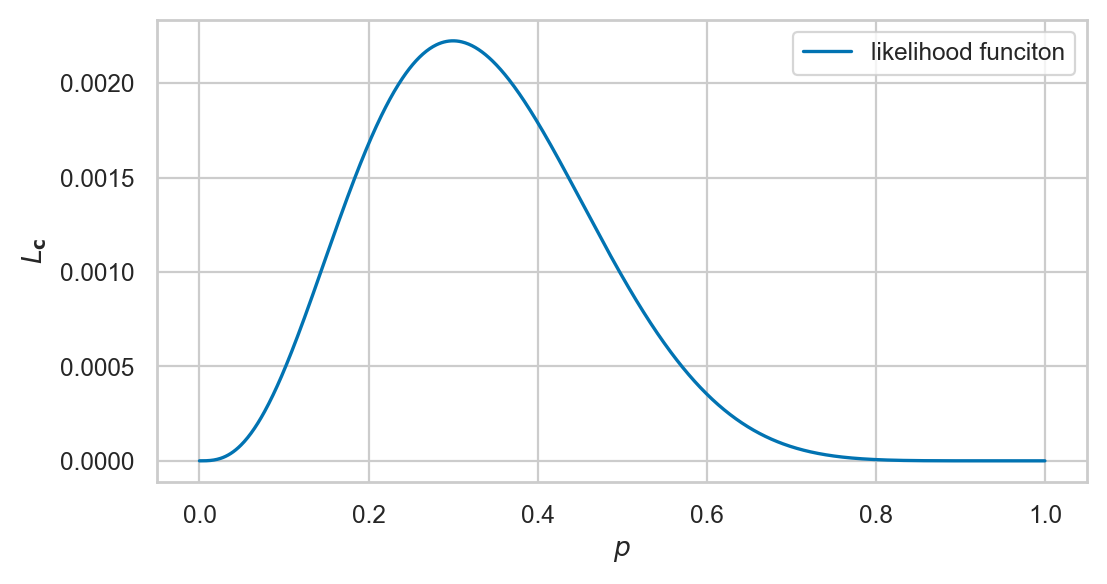

In [4]:
y = ctosses.count("heads")
n = len(ctosses)

ps = np.linspace(0, 1, 1000)
likelihoods = ps**y * (1-ps)**(n-y)
ax = sns.lineplot(x=ps, y=likelihoods, label="likelihood funciton");
ax.set_xlabel("$p$")
ax.set_ylabel("$L_{\\mathbf{c}}$");

### Coin tosses for n=100, n=1000, and n=10000

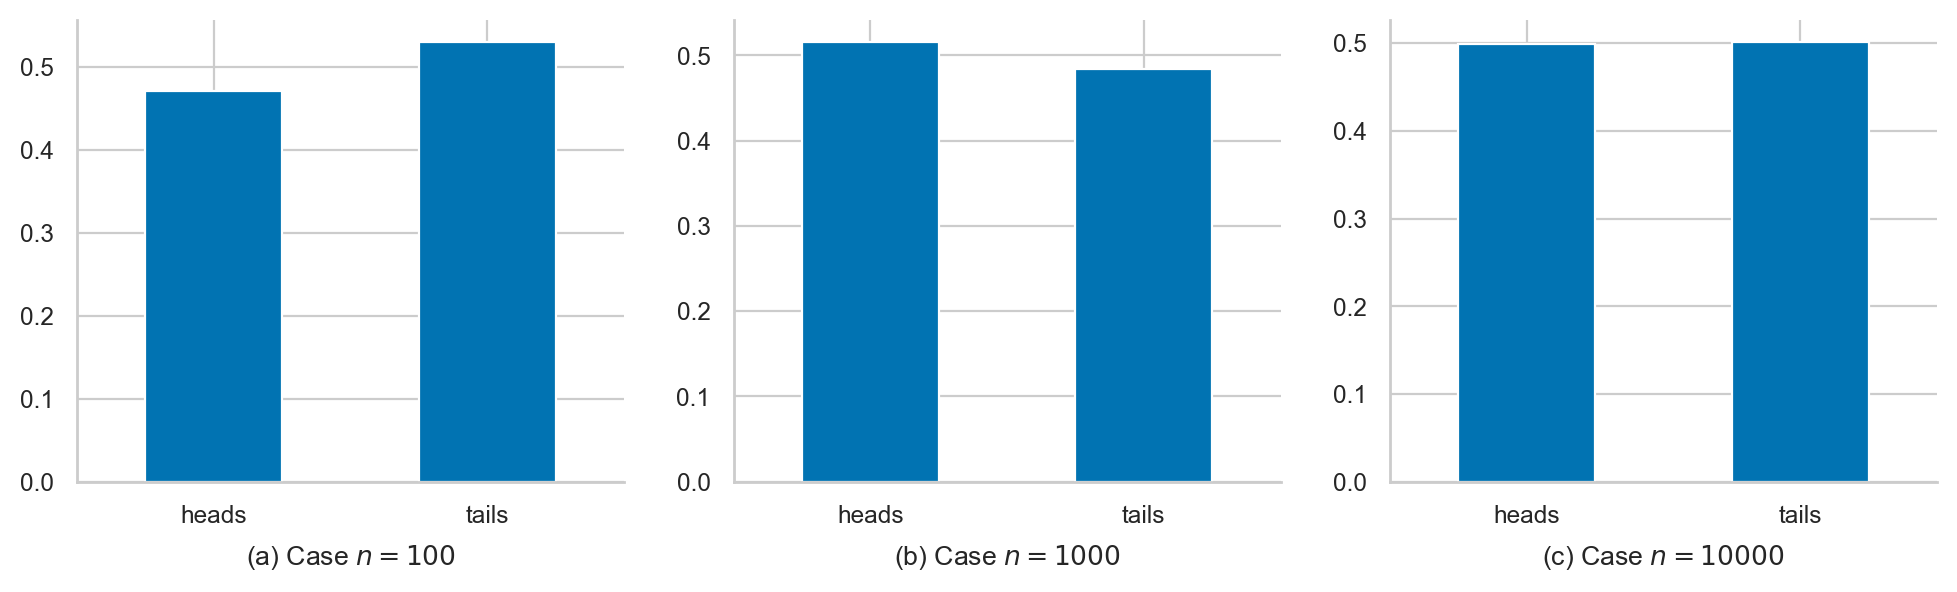

In [5]:
import numpy as np

import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import randint

rvC = randint(0, 2)


with plt.rc_context({"figure.figsize":(12,3)}):
    fig, axs = plt.subplots(1, 3)
    ax1, ax2, ax3 = axs

    n = 100
    np.random.seed(36)
    flips = rvC.rvs(n)
    s = pd.Series(flips).replace(1, "heads").replace(0, "tails")
    # print(f"Case {n=}")
    # print(s.value_counts().sort_index())
    s.value_counts(normalize=True).sort_index().plot(kind="bar", rot=0, ax=ax1)
    title1 = f"(a) Case $n={n}$"
    ax1.set_title(title1, y=0, pad=-30)
    sns.despine(top=True, right=True, ax=ax1)

    n = 1000
    np.random.seed(20)
    flips = rvC.rvs(n)
    s = pd.Series(flips).replace(1, "heads").replace(0, "tails")
    # print(f"Case {n=}")
    # print(s.value_counts().sort_index())
    s.value_counts(normalize=True).sort_index().plot(kind="bar", rot=0, ax=ax2)
    title2 = f"(b) Case $n={n}$"
    ax2.set_title(title2, y=0, pad=-30)
    sns.despine(top=True, right=True, ax=ax2)

    n = 10000
    np.random.seed(20)
    flips = rvC.rvs(n)
    s = pd.Series(flips).replace(1, "heads").replace(0, "tails")
    # print(f"Case {n=}")
    # print(s.value_counts().sort_index())
    s.value_counts(normalize=True).sort_index().plot(kind="bar", rot=0, ax=ax3)
    title3 = f"(c) Case $n={n}$"
    ax3.set_title(title3, y=0, pad=-30)
    sns.despine(top=True, right=True, ax=ax3)
    # filename = os.path.join(DESTDIR, "panel_n_coin_flips.pdf")
    # savefigure(fig, filename)

In [6]:
# via https://stackoverflow.com/questions/38698277/plot-normal-distribution-in-3d
from mpl_toolkits.mplot3d import Axes3D
from scipy.stats import multivariate_normal

# parameters
mu = [1000, 10]
Sigma = [[200**2, 18**2], [18**2, 2**2]]


# multivariate normal
rvXY = multivariate_normal(mu, Sigma)

In [7]:
from scipy.stats.contingency import margins

# sample space
xmin = 0
xmax = 2000
ymin = 0
ymax = 20

# create two 1D grid with 100 points in each dimension
xs = np.linspace(xmin, xmax, 500)
ys = np.linspace(ymin, ymax, 500)
X, Y = np.meshgrid(xs, ys)
pos = np.empty(X.shape + (2,))
pos[:, :, 0] = X
pos[:, :, 1] = Y

# compute the joint-probability density function values
fXY = rvXY.pdf(pos)

# compute marginal distibutoins
fXm, fYm = margins(fXY)
fX = fXm.flatten()
fY = fYm.flatten()

Text(0, 0.5, '$y$')

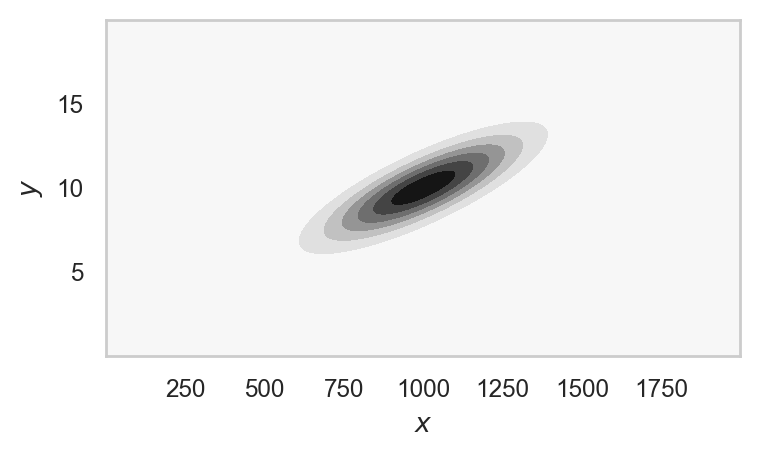

In [8]:
from matplotlib import cm
from matplotlib import gridspec


# contour plot
gs = gridspec.GridSpec(2, 2, width_ratios=[3, 1], height_ratios=[1, 4])
fig = plt.figure()
ax = plt.subplot(gs[1,0])
# Filled Contour
cax = ax.contourf(fXY, origin = 'lower',
                  extent = (xmin, xmax, ymin, ymax),
                  cmap = "Greys")

ax.set_xlabel('$x$')
ax.set_ylabel('$y$')

In [9]:
# # ALT 2. Manually iterate over (x,y) input pairs unravelled list of coords
# from matplotlib import cm

# xys = np.vstack([item.ravel() for item in [X, Y]])
# print("xys has shape", xys.shape)

# # temporary store for values of rvXY.pdf(xy)
# fXYs = np.ndarray(xys.shape[1])
# for i, xy in enumerate(xys.T):
#     fXYs[i] = rvXY.pdf(xy)
# Z = fXYs.reshape(X.shape) 

# # Create contour plot
# gs = gridspec.GridSpec(2, 2, width_ratios=[3, 1], height_ratios=[1, 4])
# fig = plt.figure()
# ax = plt.subplot(gs[1,0])
# cax = ax.contourf(Z, origin = 'lower',
#                   extent = (xmin, xmax, ymin, ymax),
#                   cmap = "Greys")

Text(0.5, 0, '$p_{XY}$')

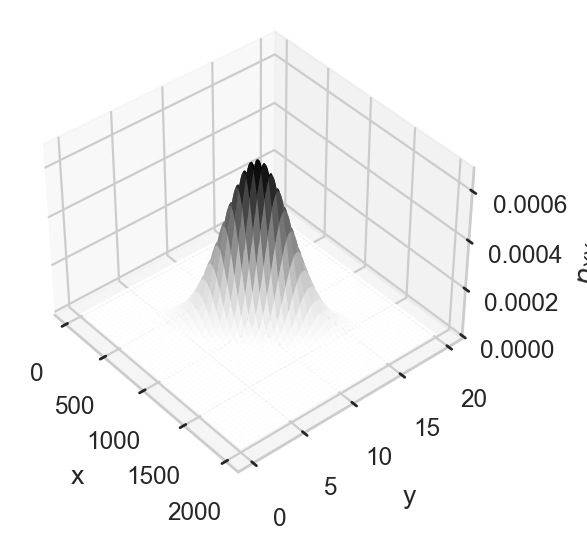

In [10]:
# 3D surface plot
fig = plt.figure()
ax = plt.axes(projection='3d')
ax.plot_surface(X, Y, fXY, cmap='Greys', linewidth=0)
ax.view_init(elev=40., azim=-40)
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('$p_{XY}$')

### Marginal density functions

In [11]:
# MOVED TO plot_joint_pdf_and_marginals
from matplotlib import gridspec
from scipy.stats.contingency import margins

xmin = 3
xmax = 17
ymin = 1.5
ymax = 8.5
ngrid = 200

xs = np.linspace(xmin, xmax, ngrid)
ys = np.linspace(ymin, ymax, ngrid)
X, Y = np.meshgrid(xs, ys)
pos = np.empty(X.shape + (2,))
pos[:, :, 0] = X
pos[:, :, 1] = Y
# ALT.
# pos = np.dstack( (X, Y) )

# compute the joint-probability density function values
fXY = rvXY.pdf(pos)


# compute marginal distibutoins
fYm, fXm = margins(fXY)
dx = (xmax - xmin) / (ngrid - 1)
dy = (ymax - ymin) / (ngrid - 1)
fX = fXm.flatten() * dy
fY = fYm.flatten() * dx

# contour plot
gs = gridspec.GridSpec(2, 2,
                       width_ratios=[6, 1],
                       height_ratios=[1, 4])
fig = plt.figure()
ax = plt.subplot(gs[1,0])
# Filled Contour
cax = ax.contourf(fXY, origin = 'lower',
                  extent = (xmin, xmax, ymin, ymax),
                  levels=12,
                  cmap = "Greys")

ax.set_xlabel('$x$')
ax.set_ylabel('$y$')
ax.text(5, 6, "$f_{XY}$", fontsize="x-large")
# # Contour Lines
# ax.contour(fXY, origin = 'lower',
#            extent = (xmin, xmax, ymin, ymax),
#            cmap = cm.bone)

# Turn off all axes
# ax.axis('off')

# Create X-marginal (top)
axt = plt.subplot(gs[0,0], sharex=ax, frameon=False, xlim=(xmin, xmax), ylim=(0, 1.1*fX.max()))
axt.plot(xs, fX, color = 'black')
axt.fill_between(xs, 0, fX, alpha=.5, color = 'gray')
axt.tick_params(labelbottom=False)
axt.tick_params(labelleft=False)
axt.text(5, 0.08, "$f_{X}$", fontsize="x-large")

# Create Y-marginal (right)
axr = plt.subplot(gs[1,1], sharey=ax, frameon=False, xlim=(0, 1.05*fY.max()), ylim=(ymin, ymax))
axr.plot(0*np.ones_like(ys), ys)
axr.plot(fY, ys, color = 'black')
axr.fill_betweenx(ys, 0, fY, alpha=0.5, color="gray")
axr.tick_params(labelbottom=False)
axr.tick_params(labelleft=False)
axr.text(0.3,3.2, "$f_{Y}$", fontsize="x-large")

#Bring the marginals closer to the contour plot
# fig.tight_layout(pad = 0.6)

# filename = os.path.join(DESTDIR, "joint_prob_density_fXY_with_marginals.pdf")
# savefigure(fig, filename)

Text(0.3, 3.2, '$f_{Y}$')

ValueError: Image size of 753015592x790586374 pixels is too large. It must be less than 2^23 in each direction.

<Figure size 600x300 with 3 Axes>

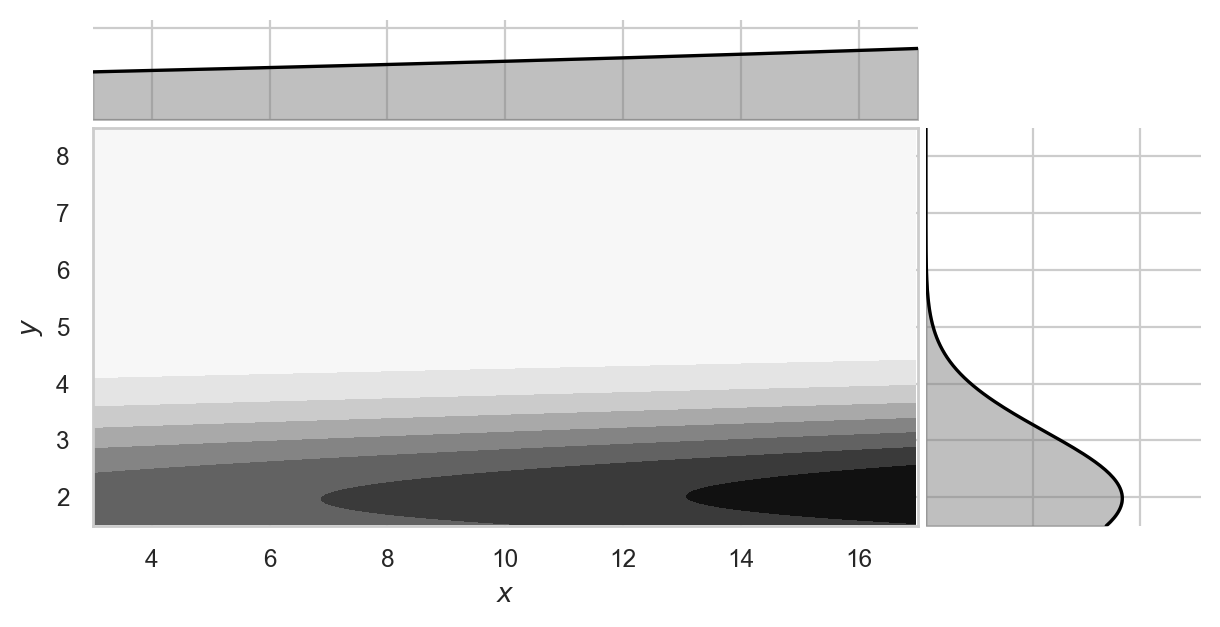

In [12]:
# contour plot
gs = gridspec.GridSpec(2, 2, width_ratios=[3, 1], height_ratios=[1, 4])
fig = plt.figure()
ax = plt.subplot(gs[1,0])
# Filled Contour
cax = ax.contourf(fXY, origin = 'lower',
                  extent = (xmin, xmax, ymin, ymax),
                  cmap = "Greys")

ax.set_xlabel('$x$')
ax.set_ylabel('$y$')
# # Contour Lines
# ax.contour(fXY, origin = 'lower',
#            extent = (xmin, xmax, ymin, ymax),
#            cmap = cm.bone)

# Turn off all axes
# ax.axis('off')

# Create X-marginal (top)
axt = plt.subplot(gs[0,0], sharex = ax, frameon = False, xlim = (xmin, xmax), ylim=(0, 1.4*fX.max()))
axt.plot(xs, fX, color = 'black')
axt.fill_between(xs, 0, fX, alpha=.5, color = 'gray')
axt.tick_params(labelbottom=False)
axt.tick_params(labelleft=False)

# Create Y-marginal (right)
axr = plt.subplot(gs[1,1], sharey = ax, frameon = False, xlim = (0, 1.4*fY.max()), ylim=(ymin, ymax))
axr.plot(fY, ys, color = 'black')
axr.fill_betweenx(ys, 0, fY, alpha = .5, color = 'gray')
axr.tick_params(labelbottom=False)
axr.tick_params(labelleft=False)

#Bring the marginals closer to the contour plot
fig.tight_layout(pad = 0.3)

### Conditional probability density functions

In [13]:
# tslices = [18, 20, 22]


# # RSCH: how to get slice at t of the kde approx surface of kprod data as a function

# # verts[i] is a list of (x, y) pairs defining polygon i.
# verts = [polygon_under_graph(x, poisson.pmf(l, x)) for l in lambdas]
# facecolors = plt.colormaps['viridis_r'](np.linspace(0, 1, len(verts)))

# poly = PolyCollection(verts, facecolors=facecolors, alpha=.7)
# ax.add_collection3d(poly, zs=lambdas, zdir='y')

# ax.set(xlim=(0, 10), ylim=(1, 9), zlim=(0, 0.35),
#        xlabel='x', ylabel=r'$\lambda$', zlabel='probability')


In [14]:
# from scipy.stats import multivariate_normal


# # parameters
# mu = [10, 5]
# Sigma = [[  3**2,     0.75*3*1],
#          [  0.75*3*1,     1**2]]


# # multivariate normal
# rvXY = multivariate_normal(mu, Sigma)


# sample space
xmin = 3
xmax = 17
ymin = 0
ymax = 10

# create 2D grid with 200 points in each dimension
ngrid = 500
xs = np.linspace(xmin, xmax, ngrid)
ys = np.linspace(ymin, ymax, ngrid)
X, Y = np.meshgrid(xs, ys)
pos = np.empty(X.shape + (2,))
pos[:, :, 0] = X
pos[:, :, 1] = Y

# compute the joint-probability density function values
fXY = rvXY.pdf(pos)

In [15]:
def find_nearest1(array, value):
    idx,val = min(enumerate(array), key=lambda x: abs(x[1]-value))
    return idx

find_nearest1(xs, 1000)

499

In [16]:
def polygon_under_graph(x, y):
    """
    Construct the vertex list which defines the polygon filling the space under
    the (x, y) line graph. This assumes x is in ascending order.
    """
    return [(x[0], 0.), *zip(x, y), (x[-1], 0.)]

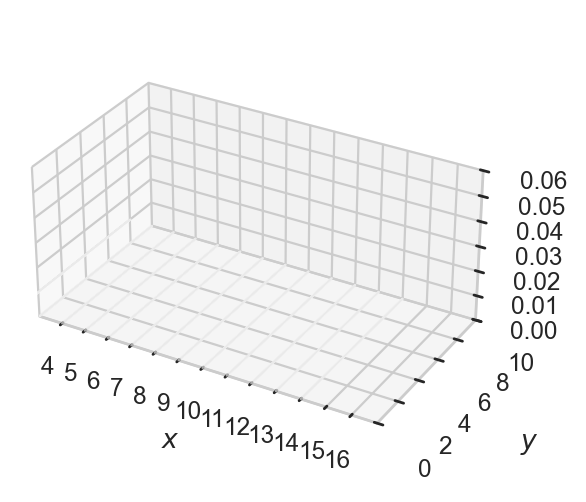

In [17]:
from matplotlib.collections import PolyCollection

ax = plt.figure().add_subplot(projection='3d')

# x-coordinates of the slices
xcuts = range(2, 15, 1)
ys = np.linspace(ymin, ymax, ngrid)

# verts[i] is a list of (x, y) pairs defining polygon i.
verts = []
for xcut in xcuts:
    xidx = find_nearest1(xs, xcut)
    fXY_at_xcut = fXY[xidx,:]
    vert = polygon_under_graph(ys, fXY_at_xcut)
    verts.append(vert)

facecolors = plt.colormaps['viridis_r'](np.linspace(0, 1, len(verts)))

poly = PolyCollection(verts, facecolors=facecolors, alpha=.6)
ax.add_collection3d(poly, zs=xcuts, zdir='x')
ax.set_box_aspect((9, 5, 4))

zmax = 0.06
ax.set(xlim=(xmin, xmax), ylim=(ymin, ymax), zlim=(0, zmax),
       xlabel=r'$x$', ylabel='$y$', zlabel='probability')
ax.set_xticks(range(4,17,1));

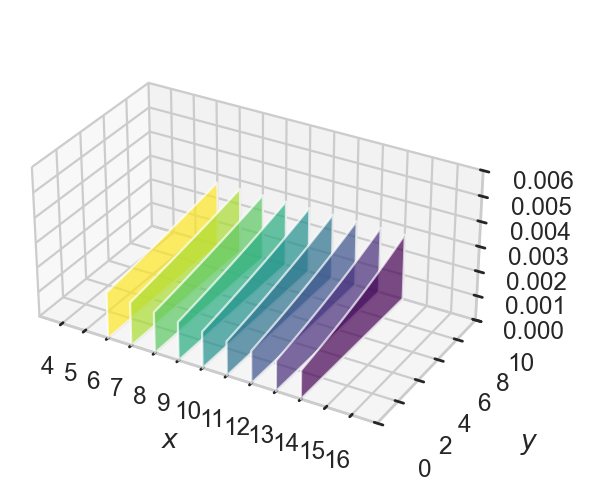

In [18]:
ax = plt.figure().add_subplot(projection='3d')

# x-coordinates of the slices
xcuts = range(6, 15, 1)
ys = np.linspace(ymin, ymax, ngrid)

# hack to find normalizing height
xmid = xcuts[len(xcuts)//2]
xmididx = find_nearest1(xs, xmid)
fXY_at_xmid = fXY[xmididx,:]
fYgiven_xmid = fXY_at_xmid / np.sum(fXY_at_xmid)
maxfYgiven_xmid = max(fYgiven_xmid)

# verts[i] is a list of (x, y) pairs defining polygon i
verts = []
for xcut in xcuts:
    xidx = find_nearest1(xs, xcut)
    fXY_at_xcut = fXY[xidx,:]
    fYgiven_xcut = fXY_at_xcut / np.sum(fXY_at_xcut)
    # hack to normalize height
    zscale = max(fYgiven_xcut) / maxfYgiven_xmid
    fYgiven_xcut = fYgiven_xcut / zscale
    # /hack to normalize height
    vert = polygon_under_graph(ys, fYgiven_xcut)
    verts.append(vert)

facecolors = plt.colormaps['viridis_r'](np.linspace(0, 1, len(verts)))

poly = PolyCollection(verts, facecolors=facecolors, alpha=.7)
ax.add_collection3d(poly, zs=xcuts, zdir='x')
ax.set_box_aspect((9, 5, 4))

zmax = 0.006
ax.set(xlim=(xmin, xmax), ylim=(ymin, ymax), zlim=(0, zmax),
       xlabel='$x$', ylabel='$y$', zlabel='probability');
ax.set_xticks(range(4,17,1));

In [19]:
# tslices = [18, 20, 22]


# # RSCH: how to get slice at t of the kde approx surface of kprod data as a function

# # verts[i] is a list of (x, y) pairs defining polygon i.
# verts = [polygon_under_graph(x, poisson.pmf(l, x)) for l in lambdas]
# facecolors = plt.colormaps['viridis_r'](np.linspace(0, 1, len(verts)))

# poly = PolyCollection(verts, facecolors=facecolors, alpha=.7)
# ax.add_collection3d(poly, zs=lambdas, zdir='y')

# ax.set(xlim=(0, 10), ylim=(1, 9), zlim=(0, 0.35),
#        xlabel='x', ylabel=r'$\lambda$', zlabel='probability')


In [20]:
from mpl_toolkits.mplot3d import Axes3D
from matplotlib.collections import PolyCollection
from scipy.stats import poisson
from scipy.stats import multivariate_normal


# parameters
mu = [1000, 10]
Sigma = [[200**2, 18**2], [18**2, 2**2]]


# multivariate normal
rvXY = multivariate_normal(mu, Sigma)

# sample space
xmin = 0
xmax = 2000
ymin = 0
ymax = 20

# create two 1D grid with 100 points in each dimension
xs = np.linspace(xmin, xmax, 500)
ys = np.linspace(ymin, ymax, 500)
X, Y = np.meshgrid(xs, ys)
pos = np.empty(X.shape + (2,))
pos[:, :, 0] = X
pos[:, :, 1] = Y

# compute the joint-probability density function values
fXY = rvXY.pdf(pos)

In [21]:
def find_nearest1(array, value):
    idx,val = min(enumerate(array), key=lambda x: abs(x[1]-value))
    return idx

find_nearest1(xs, 1000)

250

In [22]:
def polygon_under_graph(x, y):
    """
    Construct the vertex list which defines the polygon filling the space under
    the (x, y) line graph. This assumes x is in ascending order.
    """
    return [(x[0], 0.), *zip(x, y), (x[-1], 0.)]

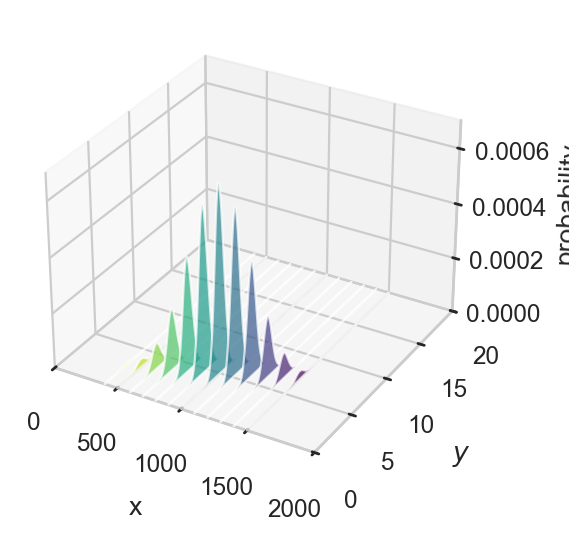

In [23]:
ax = plt.figure().add_subplot(projection='3d')

# x-coordinates of the slices
xcuts = range(400, 1600, 100)
ys = np.linspace(ymin, ymax, 1000)

# verts[i] is a list of (x, y) pairs defining polygon i.
verts = []
for xcut in xcuts:
    # y = rvXY.pdf((xcut,ys))  # TODO: figure out how to do properly
    xidx = find_nearest1(xs, xcut)
    fXY_at_xcut = fXY[xidx,:]
    vert = polygon_under_graph(ys, fXY_at_xcut)
    verts.append(vert)

facecolors = plt.colormaps['viridis_r'](np.linspace(0, 1, len(verts)))

poly = PolyCollection(verts, facecolors=facecolors, alpha=.7)
ax.add_collection3d(poly, zs=xcuts, zdir='x')

ax.set(xlim=(xmin, xmax), ylim=(ymin, ymax), zlim=(0, 0.0007),
       xlabel='x', ylabel=r'$y$', zlabel='probability');

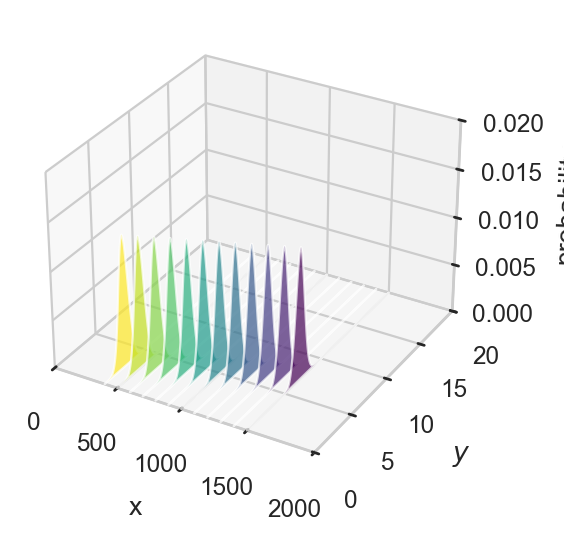

In [24]:
ax = plt.figure().add_subplot(projection='3d')

# x-coordinates of the slices
xcuts = range(400, 1600, 100)
ys = np.linspace(ymin, ymax, 1000)

# verts[i] is a list of (x, y) pairs defining polygon i.
verts = []
for xcut in xcuts:
    # y = rvXY.pdf((xcut,ys))  # TODO: figure out how to do properly
    xidx = find_nearest1(xs, xcut)
    fXY_at_xcut = fXY[xidx,:]
    fYgiven_xcut = fXY_at_xcut/np.sum(fXY_at_xcut)
    vert = polygon_under_graph(ys, fYgiven_xcut)
    verts.append(vert)

facecolors = plt.colormaps['viridis_r'](np.linspace(0, 1, len(verts)))

poly = PolyCollection(verts, facecolors=facecolors, alpha=.7)
ax.add_collection3d(poly, zs=xcuts, zdir='x')

ax.set(xlim=(xmin, xmax), ylim=(ymin, ymax), zlim=(0, 0.02),
       xlabel='x', ylabel=r'$y$', zlabel='probability');

### Examples

#### Example 1: Multivariable uniform

In [25]:
xmin = 0
xmax = 100
ymin = 0
ymax = 10

# joint pdf of = uniform(100, 200) x uniform(10,20)
def fUV(x,y):
    A = (xmax-xmin) * (ymax-ymin)
    if xmin <= x and x <= xmax and ymin <= y and y <= ymax:
        return 1/A
    else:
        return 0.0

In [26]:
from scipy.stats import uniform

rvU = uniform(0,100)
rvV = uniform(0,10)

# joint pdf of = uniform(0,100) x uniform(0,10)
def fUV(u,v):
    return rvU.pdf(u) * rvV.pdf(v)

In [27]:
fUV(70,10)

0.001

In [28]:
from scipy.integrate import dblquad

dblquad(fUV, 0, 20, 0, 300)[0]

1.0

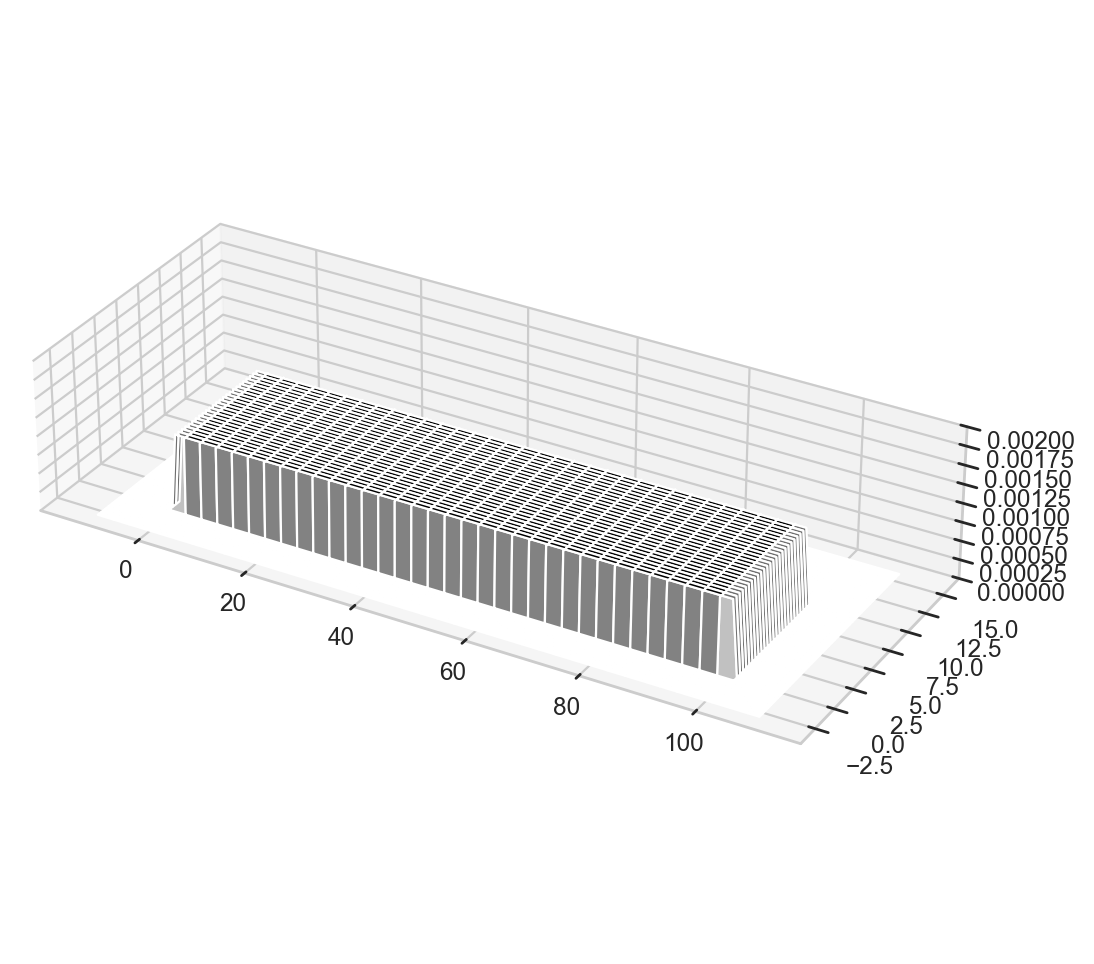

In [29]:
from mpl_toolkits.mplot3d import axes3d

fig1a = plt.figure(figsize=(12,6))
ax1a = fig1a.add_subplot(111, projection='3d')

us = np.arange(-10,110,1)
vs = np.arange(-3,16,0.1)
Us,Vs = np.meshgrid(us,vs)
fUVuv = np.vectorize(fUV)(Us,Vs)

# Plot a basic wireframe
# ax.plot_wireframe(X, Y, fUxy, rstride=10, cstride=20)
ax1a.plot_surface(Us, Vs, fUVuv, cmap="Greys")#  rstride=10, cstride=20)
ax1a.set_box_aspect((10,4,2))
ax1a.set_zlim(0,0.002);

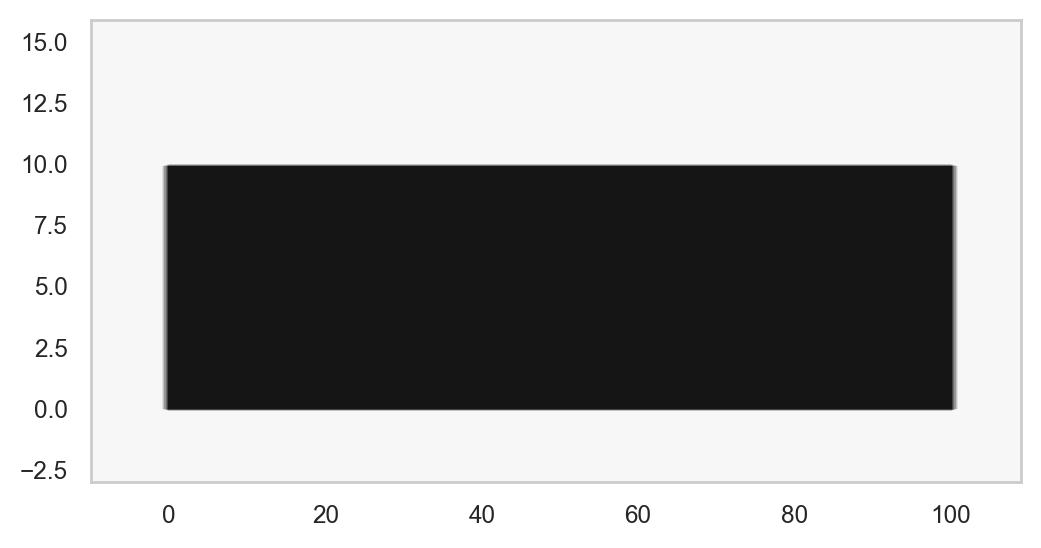

In [30]:
fig1b = plt.figure()
ax1b = fig1b.add_subplot(111)
ax1b.contourf(Us, Vs, fUVuv, cmap="Greys");

In [31]:
# via https://stackoverflow.com/questions/38698277/plot-normal-distribution-in-3d
from scipy.stats import multivariate_normal

# parameters
mu = [10, 5]
Sigma = [[  3**2,     0.75*3*1],
         [  0.75*3*1,     1**2]]


# multivariate normal
rvXY = multivariate_normal(mu, Sigma)


# SEE plot_joint_pdf_contourf and plot_joint_pdf_surface
from scipy.stats.contingency import margins

# sample space
xmin = 3
xmax = 17
ymin = 1.5
ymax = 8.5

ngrid = 200

# create two 1D grid with 100 points in each dimension
xs = np.linspace(xmin, xmax, ngrid)
ys = np.linspace(ymin, ymax, ngrid)
X, Y = np.meshgrid(xs, ys)
pos = np.empty(X.shape + (2,))
pos[:, :, 0] = X
pos[:, :, 1] = Y
# ALT.
# pos = np.dstack( (X, Y) )

# compute the joint-probability density function values
fXY = rvXY.pdf(pos)

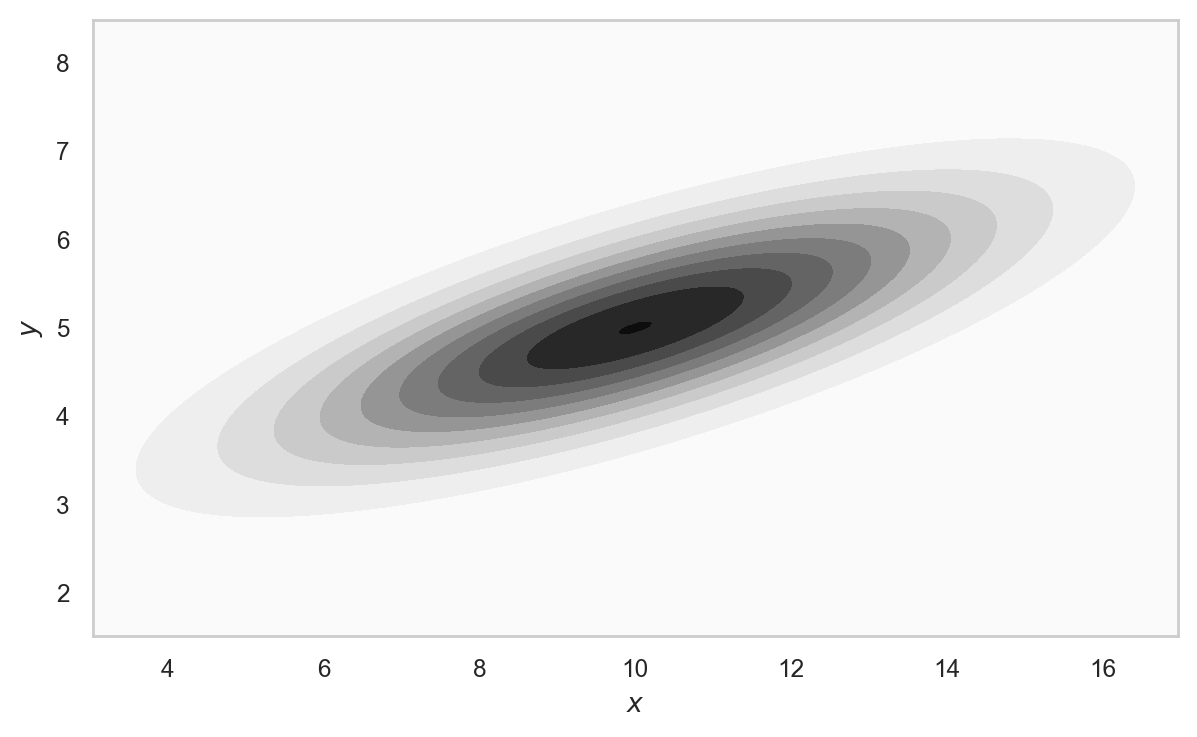

In [32]:
# contour plot MOVED to plot_joint_pdf_contourf 
with plt.rc_context({"figure.figsize":(7,4)}):
    fig, ax = plt.subplots()
    cax = ax.contourf(fXY,
                      origin='lower',
                      extent=(xmin, xmax, ymin, ymax),
                      levels=10,
                      cmap="Greys")
    
    ax.set_xlabel('$x$')
    ax.set_ylabel('$y$')

[]

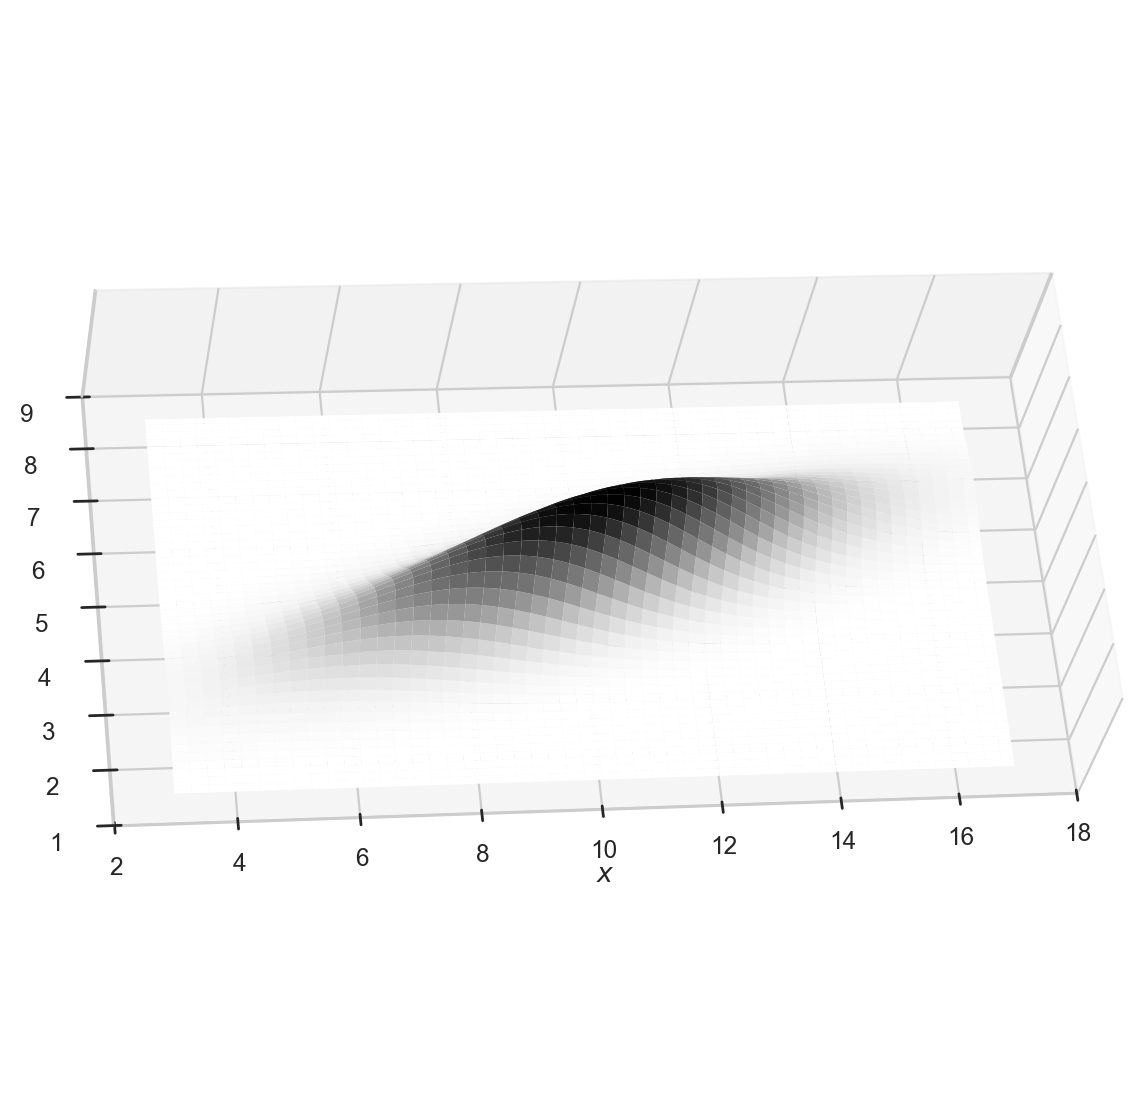

In [33]:
# 3D surface plot MOVED to plot_joint_pdf_surface
fig = plt.figure(figsize=(7,7))
ax = plt.axes(projection='3d')
ax.plot_surface(X, Y, fXY, cmap='Greys', linewidth=0)
ax.set_box_aspect((np.ptp(xs), np.ptp(ys), 3))
ax.view_init(elev=60., azim=-110, roll=-16)
ax.set_xlabel('$x$')
ax.set_ylabel('$y$')
ax.set_zlabel('$f_{XY}$')
ax.set_zticks([])

#### Example 2: Kombucha volume increasing with temperature

Consider now the joint sample space $(N,T)$,
where $T$ describes the temperature of the Kombucha that is going into the bottles,
and $N$ describes the volume that goes into each bottle.

Suppose the temperature random variable is normally distributed with standard deviation $\sigma_T = 2$
around the mean of $\mu_T = 20$,
which is written mathematically as $T \sim \mathcal{N}(20,2)$.
The variability of the volume of kombucha depends on the temperature $t$,
and is described by the random variable $N \sim \mathcal{N}(\mu_N,75)$,
where $\mu_N = 1000 + 35(t-20)$.
In other words,
the conditional distribution $f_{N|T}(n|t)$ is distributed according to:
$$
   f_{N|T} = \mathcal{N}(1000 + 35(T-20), 75).
$$

By studying the dependence between the bottling temperature and the variation in the volume,
you might be able to improve the reliability of the kombucha bottling process.
Recall that your distributor only pays for bottles that are within "spec" (mean of 1000 +/- 2 times std = $[800,1200]$).

In [34]:
from scipy.stats import norm

rvT = norm(20,2)

# joint pdf f_{NT}(n,t) = f_{N|T}(n|t) * f_T(t)
def fNT2(n,t):
    fNgivent = norm(1000+35*(t-20), 75)  # = f_{N|T=t}
    return fNgivent.pdf(n) * rvT.pdf(t)

In [35]:
ts = np.arange(15,25,0.2)
ns = np.arange(700,1300,10)
Ts, Ns = np.meshgrid(ts,ns)
fNT2nt = np.vectorize(fNT2)(Ns,Ts)

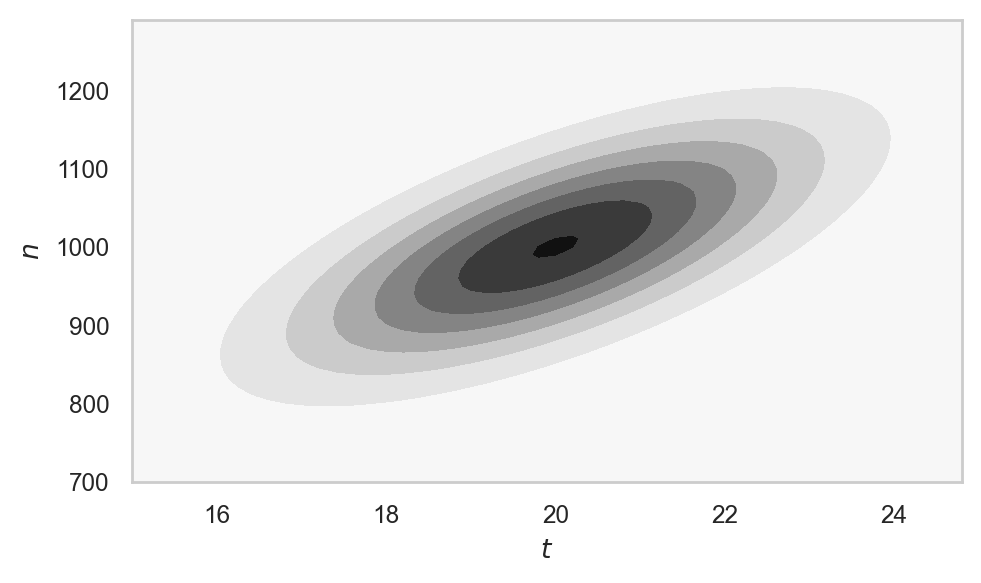

In [36]:
filename = "figures/prob/joint_pdf_f_NT_temp_dep_mean.pdf"

with plt.rc_context({"figure.figsize":(5,3)}):
    fig2 = plt.figure()
    ax2 = fig2.add_subplot(111)
    ax2.contourf(Ts, Ns, fNT2nt, cmap="Greys")
    ax2.set_xlabel('$t$')
    ax2.set_ylabel('$n$')
    fig2.tight_layout()
    fig2.savefig(filename, dpi=300, bbox_inches="tight", pad_inches=0)

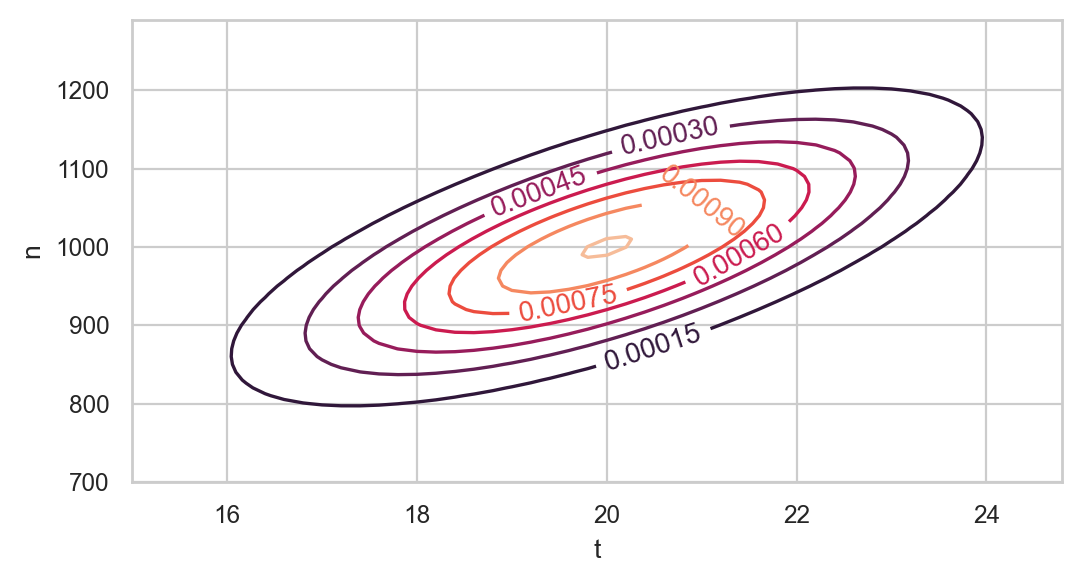

In [37]:
# Alternative way to generate surface plot with labels
# via https://github.com/fonnesbeck/scipy2015_tutorial/blob/master/notebooks/5.%20Bayesian%20Statistics.ipynb
# Calculate posterior on grid using for loops
z = np.array([[fNT2(n,t) for t in ts] for n in ns])
cplot = plt.contour(Ts, Ns, z) # levels=[0, 0.0001, 0.0005, 0.001])
plt.clabel(cplot, inline=1, fontsize=10) #  fmt='%1.1f')
cplot.axes.set_xlabel('t')
cplot.axes.set_ylabel('n');

#### Example 3: Temperature-dependent variability

Consider now an alternative scenario in which the **variance** of the volume of kombucha $N$
varies with temperature.
The temperature random variable is $T \sim \mathcal{N}(20,2)$.
And the volume of kombucha is described by the random variable $N \sim \mathcal{N}(1000,\sigma_N)$,
where $\sigma_N = 100 + 5(t-20)$.
In other words,
the conditional distribution $f_{N|T}(n|t)$ is distributed according to:
$$
   f_{N|T} = \mathcal{N}(1000, 100 + 5(t-20)).
$$


In [38]:
from scipy.stats import norm

rvT = norm(20,2)

infos = {}
# joint pdf f_{NT}(n,t) = f_{N|T}(n|t) * f_T(t)
def fNT3(n,t):
    fNgivent = norm(1000, 100 + 14*(t-20))
    return fNgivent.pdf(n) * rvT.pdf(t)

In [39]:
ts = np.arange(15,25,0.2)
ns = np.arange(700,1300,10)
Ts, Ns = np.meshgrid(ts,ns)
fNT3nt = np.vectorize(fNT3)(Ns,Ts)

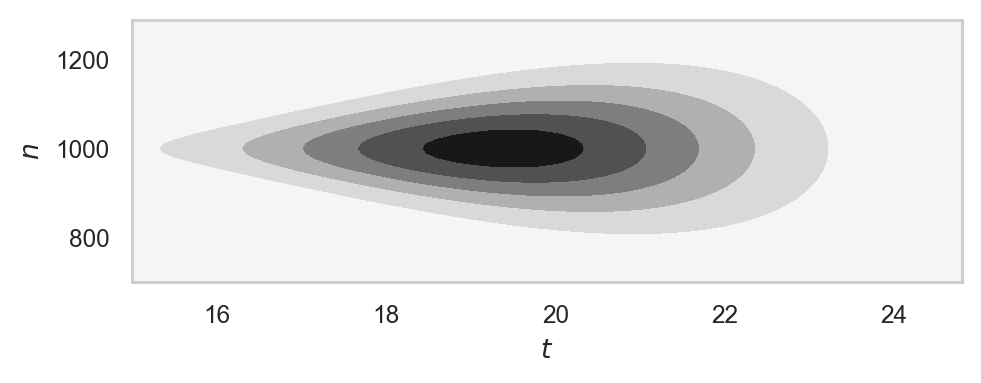

In [40]:
filename = "figures/prob/joint_pdf_f_NT_temp_dep_variance.pdf"

with plt.rc_context({"figure.figsize":(5,2)}):
    fig3 = plt.figure()
    ax3 = fig3.add_subplot(111)
    ax3.contourf(Ts, Ns, fNT3nt, cmap="Greys")
    ax3.set_xlabel('$t$')
    ax3.set_ylabel('$n$')
    fig3.tight_layout()
    fig3.savefig(filename, dpi=300, bbox_inches="tight", pad_inches=0)

In [41]:
## ALT. Plot a basic wireframe
# from mpl_toolkits.mplot3d import axes3d
# fig = plt.figure(figsize=(12,6))
# ax = fig.add_subplot(111, projection='3d')
# # ax.plot_wireframe(X, Y, fUxy, rstride=10, cstride=20)
# ax.plot_surface(X, Y, fNT2xy, cmap="Greys")#  rstride=10, cstride=20)
# ax.set_box_aspect((10,4,2))
# # ax.set_zlim(0,0.002)

### Cauchy (optional)

In [42]:
from scipy.stats import cauchy

x0 = 3
gamma = 5

rvC = cauchy(x0, gamma)

In [43]:
rvC.mean(), rvC.var()

(nan, nan)

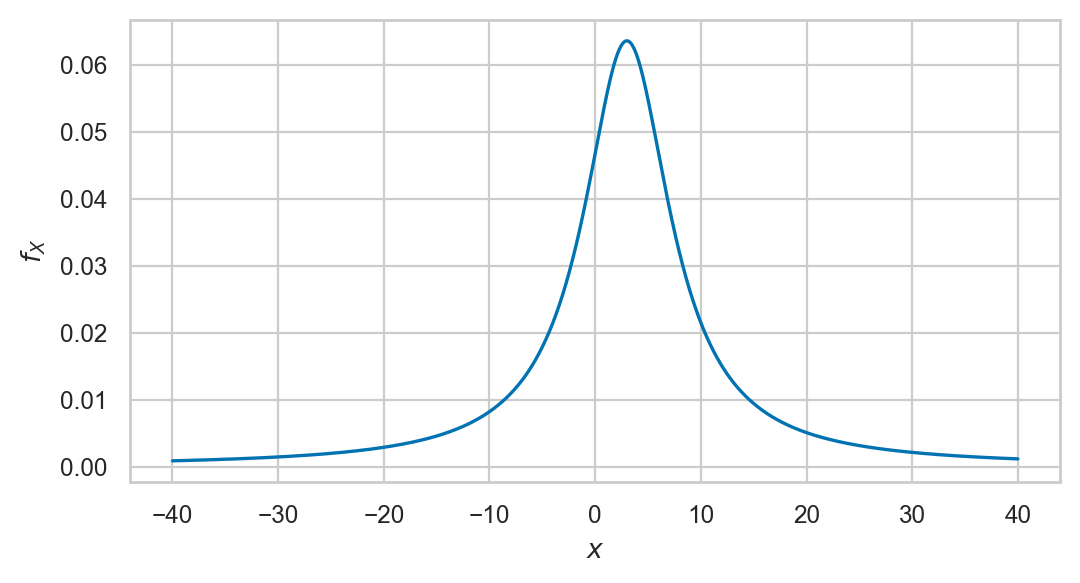

In [44]:
from ministats import plot_pdf
plot_pdf(rvC, xlims=[-40,40]);

In [45]:
from scipy.stats import cauchy

xmax = 41
xs = np.linspace(0, xmax, 1000)
xticks = np.arange(0, xmax, 5)

# parameter dicts (list of lists)
params_matrix = [
    [dict(loc=10,scale=5),  dict(loc=20,scale=5),  dict(loc=30,scale=5)],
    [dict(loc=20,scale=2),  dict(loc=20,scale=4),  dict(loc=20,scale=8)],
]

params_to_latex = {
    "loc": "x_0",
    "scale": r"\gamma"
}

# filename = os.path.join(DESTDIR, "cauchy_panel.pdf")
# generate_pdf_panel(filename, xs, cauchy, params_matrix, xticks=xticks, ylims=[-0.01,0.193],
#                    params_to_latex=params_to_latex);

## From Section 2.7

#### Example 2: generating observations from a shifted uniform distribution



$V \sim \mathcal{U}(\alpha=100,\beta=120)$




In [46]:
import random

def gen_v():
    u = random.random()
    v = 100 + 20*u
    return v

In [47]:
gen_v()

107.08772027497673

In [48]:
N = 1000
vsample = [gen_v() for i in range(0,N)]

In [49]:
vsample[0:3]  # first three observations

[118.01996441539309, 119.45957525430133, 115.64948010098493]

In [50]:
min(vsample), max(vsample)  # Range

(100.00752724223045, 119.96553080970263)

<Axes: ylabel='Density'>

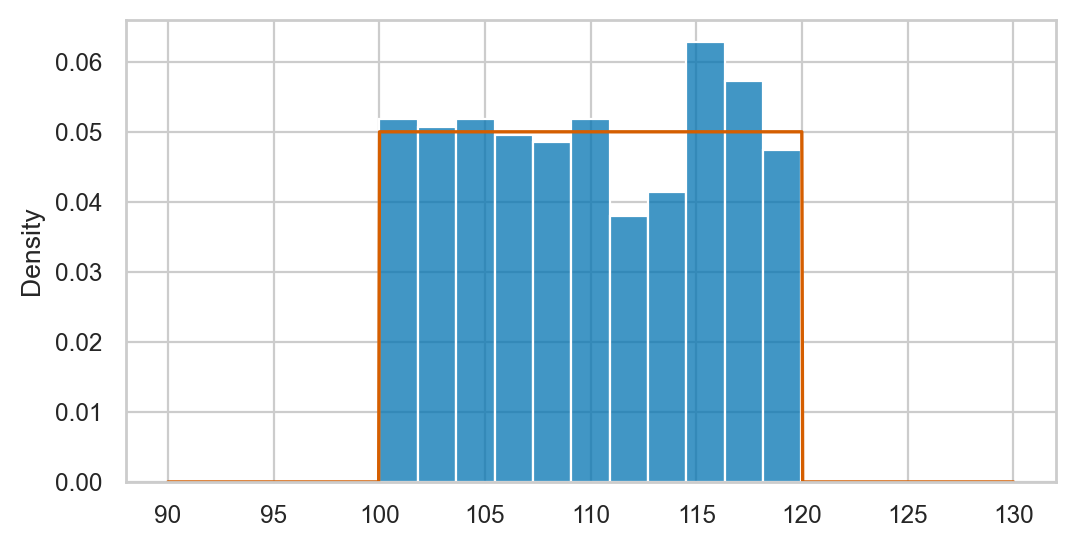

In [51]:
# plot a histogram of data in `vsample`
sns.histplot(vsample, stat="density")

# plot the pdf of the model
from scipy.stats import uniform
rvV = uniform(100,20)
xs = np.linspace(90,130,1000)
sns.lineplot(x=xs, y=rvV.pdf(xs), color="r")

### Visualizing the empirical cumulative distribution

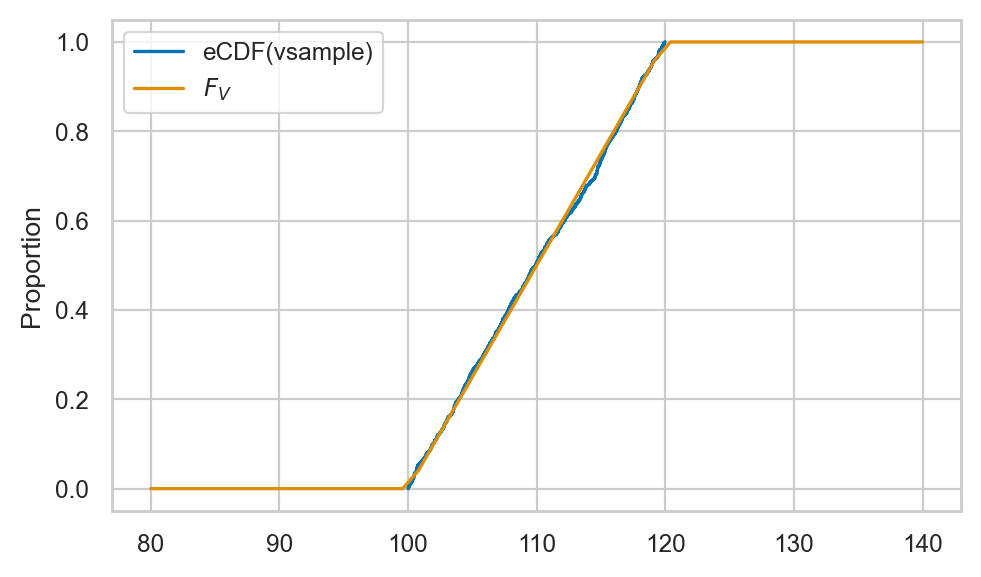

In [52]:
filename = "figures/prob/ecdf_vsample_and_cdf_plot_rvV.pdf"

from scipy.stats import uniform
rvV = uniform(100,20)

with plt.rc_context({"figure.figsize":(5,3)}):
    ax = sns.ecdfplot(vsample, label="eCDF(vsample)")
    bs = np.linspace(80,140)
    sns.lineplot(x=bs, y=rvV.cdf(bs), ax=ax, label="$F_V$")
    ax.figure.tight_layout()
    ax.set_ylim([-0.05,1.05])
    ax.figure.savefig(filename, dpi=300, bbox_inches="tight", pad_inches=0.02)

In [53]:
# # ALT. manually plot ecdf using lineplot
# bs = np.linspace(80,140,1000)
# empFvs = [ecdf(vsample,b) for b in bs]
# sns.lineplot(x=bs, y=empFvs, drawstyle='steps-post')

### Discrete random variable generation

Splitting up the uniform random variable ...

#### Example 1: generating Bernoulli observations

Consider the Bernoulli random variable $B \sim \textrm{Bernoulli}(p)$,
which corresponds to a coin toss with probability of heads (outcome 1) equal to $p$,
and probability of tails (outcome 0) $(1-p)$.

The function `gen_b` defined below is a generator of observations from the random variable $B$.

In [54]:
def gen_b(p):
    u = random.random()
    if u < p:
        return "heads"
    else:
        return "tails"

To generate a random observation from $B \sim \textrm{Bernoulli}(p=0.3)$,
we simply need to call the function `gen_b` with the keyword argument `p=0.3`.

In [55]:
gen_b(p=0.3)

'tails'

Let's now generates `n=1000` observations from $B \sim \textrm{Bernoulli}(p=0.3)$,
and compute the proportion of the outcome $1$ (heads) in the list.

In [56]:
N = 1000
bs = [gen_b(p=0.3) for i in range(0,N)]
bs.count("heads") / N

0.311

In [57]:
# # ALT. Use regular for-loop, instead of list comprehension syntax
# N = 1000
# bsample = []
# for i in range(0,n):
#     b = gen_b(p=0.3)
#     bsample.append(b)
# bsample.count(1) / n

## Measuring data-model fit

Want to measure if `es` comes from $\textrm{Expon}(\lambda=0.2)$.
Here are the first five values we simulated:

### Generating lists of random observations

In [58]:
from scipy.stats import expon

lam = 0.2
rvE = expon(loc=0, scale=1/lam)

In [59]:
from scipy.stats import expon
lam = 0.2
rvE = expon(loc=0, scale=1/lam)
N = 100  # number of observations to generate
es = rvE.rvs(N)


In [60]:
np.random.seed(44)

N = 100  # number of observations to generate
es = rvE.rvs(N)
es[0:20].round(3)

array([ 9.004,  0.554,  6.825,  2.235,  2.226,  4.698,  2.503,  2.63 ,
        3.566,  6.192, 16.161,  3.05 ,  2.79 ,  0.602,  1.229, 15.788,
       14.354, 10.678,  5.198,  1.203])

In [61]:
es[0:5]

array([9.00426794, 0.55351885, 6.82541425, 2.23534983, 2.22605433])

Let's also generate an additional sample `ns`
from the normal distribution $\mathcal{N}(1000,100)$
so we'll be able to make a variety of comparisons.

In [62]:
from scipy.stats import norm

np.random.seed(6)
rvN = norm(100, 5)
ns = rvN.rvs(200)
ns[0:3]

array([ 98.44108163, 103.64501962, 101.08910394])

### Visual comparison between data and model distributions



#### Shifted uniform distribution

Here is the code for comparison of `vs` and the theoretical model `rvV` $= \mathcal{U}(100,120)$.

In [63]:
# from scipy.stats import uniform
# rvV = uniform(100,20)

In [64]:
# fig, axs = plt.subplots(1,2, figsize=(8,3))
# xs = np.linspace(90,130,1000)

# # plot histogram of `vs`
# sns.histplot(vs, stat="density", ax=axs[0], label="vs")

# # plot the pdf of rvV 
# sns.lineplot(x=xs, y=rvV.pdf(xs), color="r", ax=axs[0], label="$f_V$")
# lines, labels = axs[0].get_legend_handles_labels()
# axs[0].legend(reversed(lines[0:2]), reversed(labels[0:2]))

# # plot a empirical cumulative distribution
# sns.ecdfplot(vs, ax=axs[1], label="eCDF(vs)")

# # plot the CDF of rvV
# sns.lineplot(x=xs, y=rvV.cdf(xs), color="r", ax=axs[1], label="$F_V$")
# axs[1].set_ylim(-0.05, 1.05)

#### Exponential distribution

In [65]:
from scipy.stats import expon
lam = 0.2
rvE = expon(0, 1/lam)

Here is the code for visual comparison of `es` and the theoretical model `rvE` $=\mathrm{Expon}(\lambda=0.2)$, based on the probability density and cumulative probability distributions.

(-0.05, 1.05)

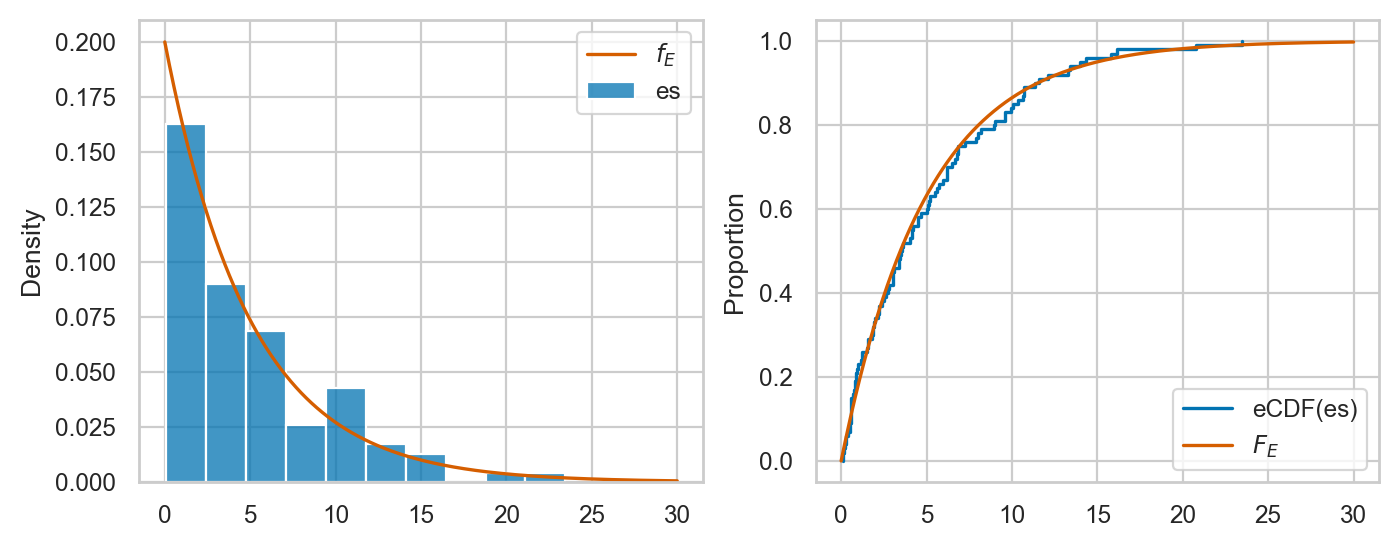

In [66]:
fig, axs = plt.subplots(1,2, figsize=(8,3))
xs = np.linspace(0,30,1000)

# plot histogram of `es`
sns.histplot(es, stat="density", ax=axs[0], label="es")

# plot the pdf of rvE
sns.lineplot(x=xs, y=rvE.pdf(xs), color="r", ax=axs[0], label="$f_E$")
lines, labels = axs[0].get_legend_handles_labels()
# axs[0].legend(reversed(lines[0:2]), reversed(labels[0:2]))

# plot a empirical cumulative distribution
sns.ecdfplot(es, ax=axs[1], label="eCDF(es)")

# plot the CDF of rvE
sns.lineplot(x=xs, y=rvE.cdf(xs), color="r", ax=axs[1], label="$F_E$")
axs[1].set_ylim(-0.05, 1.05)

### Using Q-Q plots to compare quantiles

The quantile-quantile plot `qqplot(data, dist)`
is used to compare the positions of the quantiles of the dataset `data`
against the quantiles of the theoretical distribution `dist`,
which is an instance of one of the probability models in `scipy.stats`.

The easiest way to generate a Q-Q plot is to use
the function `qqplot` defined in the the `statsmodels` package.

In [67]:
from statsmodels.graphics.api import qqplot

#### Examples of good fit


##### Normal data vs. the true normal model

Let's look at the quantiles of the data in `ns`,
plotted versus the quantiles of the theoretical model $\mathcal{N}(1000,100)$.

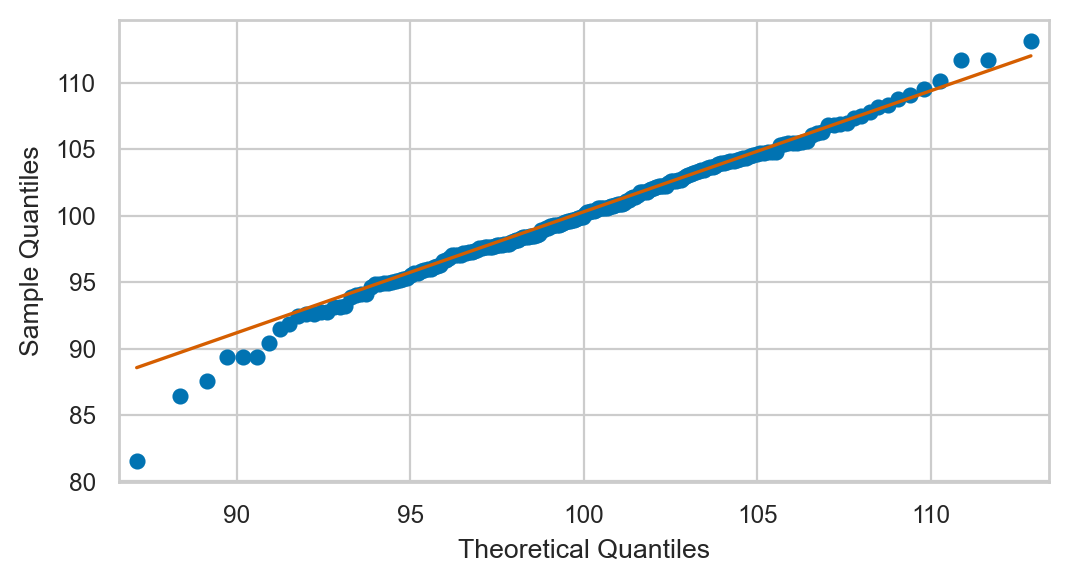

In [68]:
qqplot(ns, dist=rvN, line='q');

#### Normal data vs. the standard normal

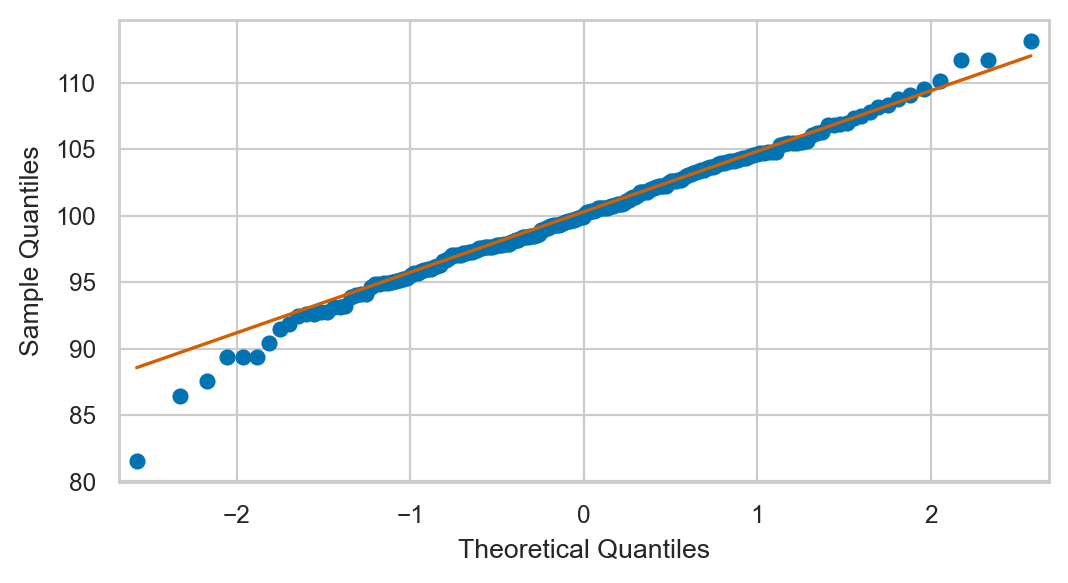

In [69]:
qqplot(ns, dist=norm(0,1), line='q');

#### Examples of bad fit

##### Shifted uniform data vs. standard normal

In [70]:
# vs = np.array(vs)
# qqplot(vs, dist=norm(0,1), line="q");

##### Exponential data vs. standard normal

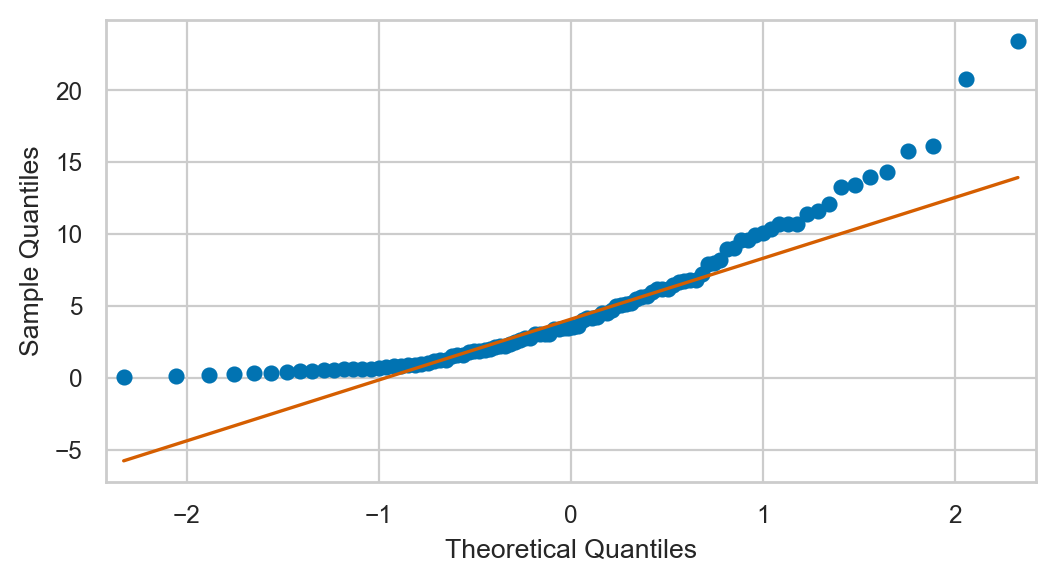

In [71]:
es = np.array(es)  # NOT NEEDED AFTER RESTRUCTURING
qqplot(es, dist=norm(0,1), line="q");

Note the lowest quantiles don't match (exponential data limited to zero),
and the high quantiles don't match either (exponential data has a long tail).

#### Shifted uniform sample vs. true model

In [72]:
# vs = np.array(vs)
# qqplot(vs, dist=rvV, line="q");

#### Exponential sample vs. true exponential model

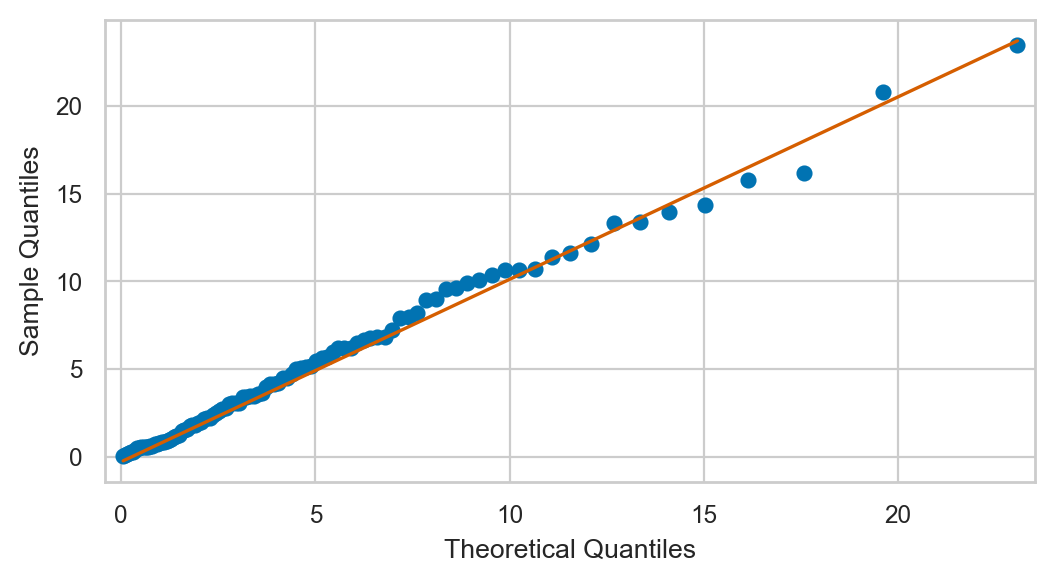

In [73]:
qqplot(es, dist=rvE, line="q");

#### Generating a Q-Q plot manually (bonus material)

If want to know how the Q-Q plot is generated,
you can look at the following function `qq_plot` which the same way as `qqplot`.

In [74]:
def qq_plot(sample, dist, line="q"):
    qs = np.linspace(0, 1, len(sample))
    xs = dist.ppf(qs)
    ys = np.quantile(sample, qs)
    ax = sns.scatterplot(x=xs, y=ys, alpha=0.2)
    if line == "q":
        # compute the parameters m and b for the diagonal
        xq25, xq75 = dist.ppf([0.25, 0.75])
        yq25, yq75 = np.quantile(sample, [0.25,0.75])
        m = (yq75-yq25)/(xq75-xq25)
        b = yq25 - m * xq25
        # add the line  y = m*x+b  to the plot
        linexs = np.linspace(min(xs[1:]),max(xs[:-1]))
        lineys = m*linexs + b
        sns.lineplot(x=linexs, y=lineys, ax=ax, color="r")
    return ax


In [75]:
# # ALT2. use the `probplot` from the `scipy.stats` module
# from scipy.stats import probplot
# probplot(ns, dist=norm(1000,100), plot=plt)

### Comparing moments

A simple way to measure how well the data sample $\mathbf{x} = (x_1, x_2, \ldots , x_n)$
fits the probability model $f_X$ is to check if the data distribution
and the probability distribution have the same moments.

In order to easily be able to calculate the moments of the data samples,
we'll convert `es` into a Pandas series object,
which has all the necessary methods.

In [76]:
eseries = pd.Series(es)

#### Moments of exponential distribution

In [77]:
eseries.mean(), rvE.mean()

(5.0600529696970495, 5.0)

In [78]:
eseries.var(), rvE.var()

(22.66265272816951, 25.0)

Let's now compare the [skew](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.skew.html) of dataset and the [skew](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.rv_continuous.stats.html#scipy.stats.rv_continuous.stats) of the distribution:

In [79]:
eseries.skew(), rvE.stats("s")

(1.4132820318821762, 2.0)

Finally,
let's compare the [kurtosis](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.kurt.html) of dataset and the [kurtosis](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.rv_continuous.stats.html#scipy.stats.rv_continuous.stats) of the distribution.

In [80]:
eseries.kurt(), rvE.stats("k")

(2.157007743494337, 6.0)

#### Example of bad fit between higher moments

Define the random variable `rvNE` as the best normal approximation to random variable `rvE`.

In [81]:
rvNE = norm(5,5)
rvNE.mean(), rvNE.var()

(5.0, 25.0)

In [82]:
eseries.skew(), rvNE.stats("s")

(1.4132820318821762, 0.0)

In [83]:
eseries.kurt(), rvNE.stats("k")

(2.157007743494337, 0.0)

### Kolmogorov–Smirnov test

In [84]:
from scipy.stats import ks_1samp

Let's jump right ahead and compute the KS distance for the data and distribution of interest.

In [85]:
ks_1samp(ns, rvN.cdf).statistic

0.055768108496866

In [86]:
ks_1samp(es, rvE.cdf).statistic

0.04710507341770093

In [87]:
# ks_1samp(vs, rvV.cdf).statistic

#### Example of big distance

In [88]:
ks_1samp(es, rvNE.cdf).statistic

0.1625540394795041

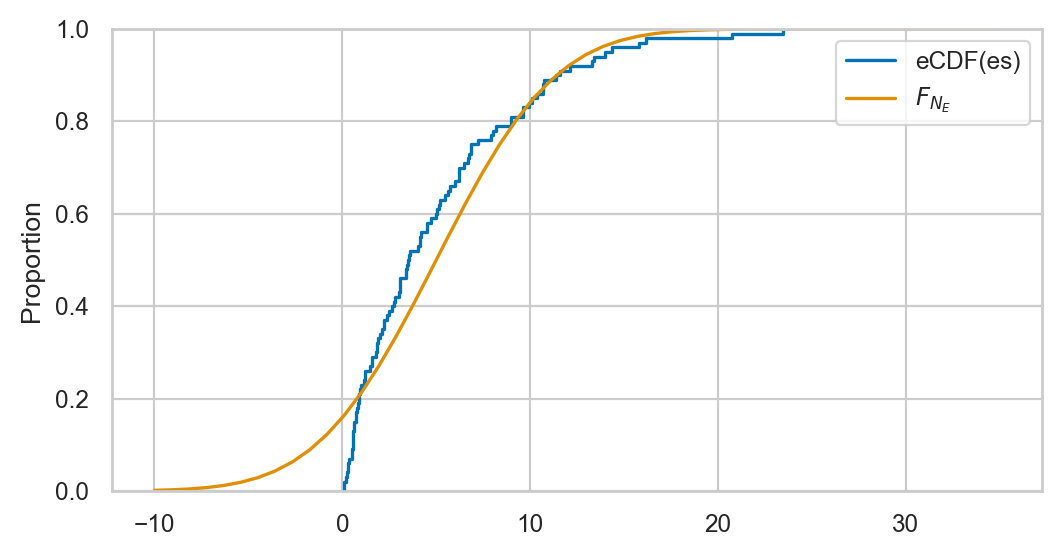

In [89]:
sns.ecdfplot(es, label="eCDF(es)")
bs = np.linspace(-10,35)
sns.lineplot(x=bs, y=rvNE.cdf(bs), label="$F_{N_E}$");

#### KS distances after standardization (optional)

Define the function `standardize` that transforms any dataset
so it will have mean zero, and standard deviation one.

In [90]:
def standardize(data):
    xbar = data.mean()
    s = data.std()
    return (data-xbar)/s

In [91]:
# ALT. Use existing function that does the same as `standardize`
from scipy.stats import zscore

We can now report the KS distances,
between the standardized version so `ns`, `es`, and `vs` and
standard normal $\mathcal{N}(0,1)$,
to check how "normal" they are.

In [92]:
ks_1samp(zscore(ns), norm(0,1).cdf).statistic

0.04778942770274594

In [93]:
# ks_1samp(zscore(vs), norm(0,1).cdf).statistic

In [94]:
ks_1samp(zscore(es), norm(0,1).cdf).statistic

0.1465376731347297

In [95]:
data = expon(0,10).rvs(100)
ks_1samp(zscore(data), norm(0,1).cdf).statistic

0.15375958533941575

#### Calculating the KS distance manually (optional)

The computation is a little tricky since the eCDF is a stepwise function,
so we need to two differences $|F_X(x_i) - F_{\mathbf{x}}(x_i)|$
and $|F_X(x_i) - F_{\mathbf{x}}(x_{i-1})|$.

In [96]:
def gen_e(lam):
    u = np.random.rand()
    e = -1 * np.log(1-u) / lam
    return e

np.random.seed(26) 

N = 200  # number of observations to generate
es2 = [gen_e(lam=0.2) for i in range(N)]

In [97]:
def eCDF(data, b):
    sdata = np.sort(data)
    count = sum(sdata <= b)    # num. of obs. <= b
    return count / len(data)   # proportion of total

In [98]:
# THIS SEEMS TO BE BROKEN
def ks_dist(sample, rv=norm(0,1)):
    """
    Compute the KS distance between observed data in `sample`
    and the theoretical distribution of random variable `rv`.
    """
    sample = sorted(sample)
    ks_dists = []

    x0 = sample[0]
    ks_dist0 = rv.cdf(x0)
    ks_dists.append(ks_dist0)

    N = len(sample)
    for i in range(N):
        # xi
        xi = sample[i]
        eCDFxi = eCDF(sample, b=xi)
        ks_dist1 = abs(eCDFxi - rv.cdf(xi))
        ks_dists.append(ks_dist1)
        # x(i-1)
        xim1 = sample[i-1]
        eCDFxim1 = eCDF(sample, b=xim1)
        ks_dist2 = abs(eCDFxim1 - rv.cdf(xi))
        ks_dists.append(ks_dist2)

    # find max
    max_ks_dist = max(ks_dists)
    return max_ks_dist


# ks_dist(es2, rvE)

In [99]:
# CORRECT IMPLEMENTATION
def ks_distance(sample, dist_cdf):
    """
    Compute the Kolmogorov–Smirnov distance between an empirical sample and a reference CDF.
    Parameters:
    - sample: array-like, empirical data
    - dist_cdf: callable, cumulative distribution function (e.g., rv.cdf)
    Returns:
    - D: float, the KS distance
    """
    sample_sorted = np.sort(sample)
    n = len(sample_sorted)
    
    # Empirical CDF values: i/n for the right-limit, (i-1)/n for left-limit
    ecdf_vals = np.arange(1, n+1) / n
    cdf_vals = dist_cdf(sample_sorted)
    
    # Compute KS statistic: max absolute difference
    D_plus = np.max(ecdf_vals - cdf_vals)
    D_minus = np.max(cdf_vals - (np.arange(0, n) / n))
    D = max(D_plus, D_minus)
    
    return D

ks_distance(es2, rvE.cdf)

0.048609282602185055

##### Test 1

In [100]:
ks_dist(ns, rv=rvN)

0.9998879767996761

In [101]:
ks_1samp(ns, rvN.cdf).statistic

0.055768108496866

##### Test 2

In [102]:
ks_dist(standardize(ns), rv=norm(0,1))

0.999933625427922

In [103]:
ks_1samp(standardize(ns), norm(0,1).cdf).statistic

0.04778942770274594

In [104]:
ks_1samp(es, rvN.cdf).statistic

1.0

## Hypergeometric (optional)

<!--
- arg1 = `internal M` = the total number of objects   == a+b
- arg2 = `internal n` = number of success objects     == a 
- arg3 = `internal N` = number of draws               == n
-->

In [105]:
from scipy.stats import hypergeom

a = 30   # number of success balls
b = 40   # number of failure balls
n = 20   # how many we're drawing

rvH = hypergeom(a+b, a, n)

In [106]:
rvH.support()

(0, 20)

In [107]:
rvH.mean(), rvH.var()

(8.571428571428571, 3.54924578527063)

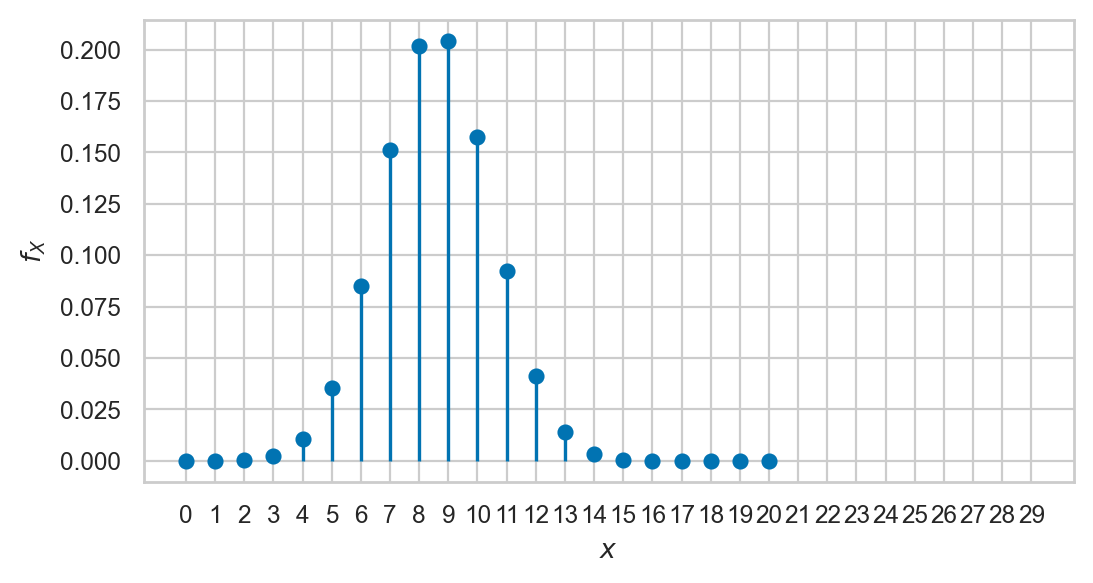

In [108]:
from ministats import plot_pmf
plot_pmf(rvH, xlims=[0,30]);

##### Tomatoes salad probabilities

(0.28571428571428575, 0.5714285714285715, 0.14285714285714288)

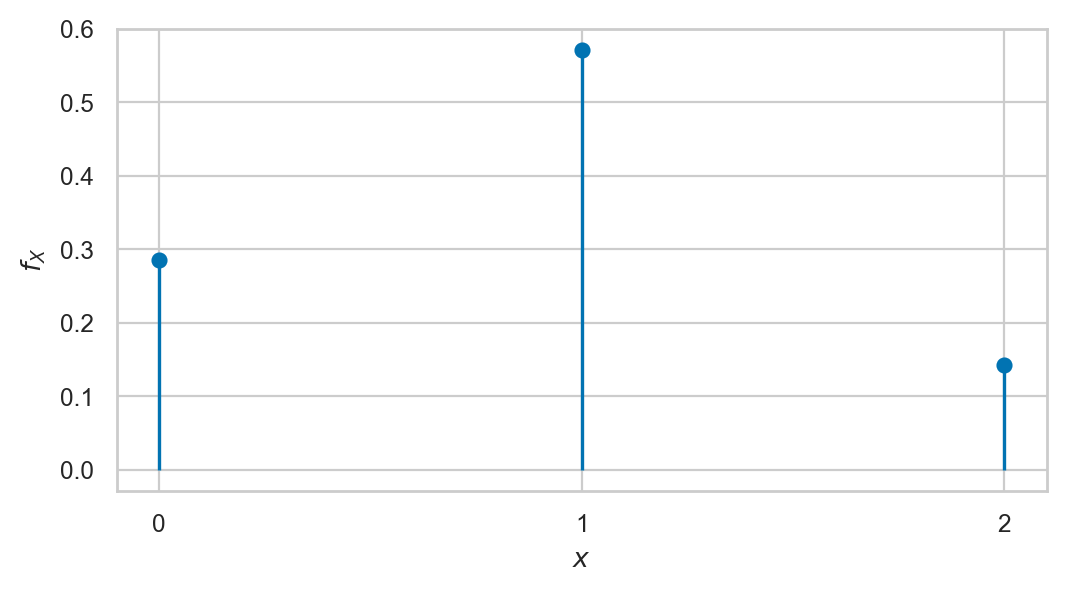

In [109]:
a = 3   # number of good tomatoes
b = 4   # number of rotten tomatoes
n = 2   # how many we're drawing

rvHe = hypergeom(a+b, a, n)


plot_pmf(rvHe, xlims=[0,3])

rvHe.pmf(0), rvHe.pmf(1), rvHe.pmf(2)

##### Number of dogs seen by Amy

In [110]:
a = 7        # number dogs
b = 20 - 7   # number of other animals
n = 12       # how many "patients" Amy will see today

rvD = hypergeom(a+b, a, n)

In [111]:
# Pr of exactly five dogs
rvD.pmf(5)

0.2860681114551084

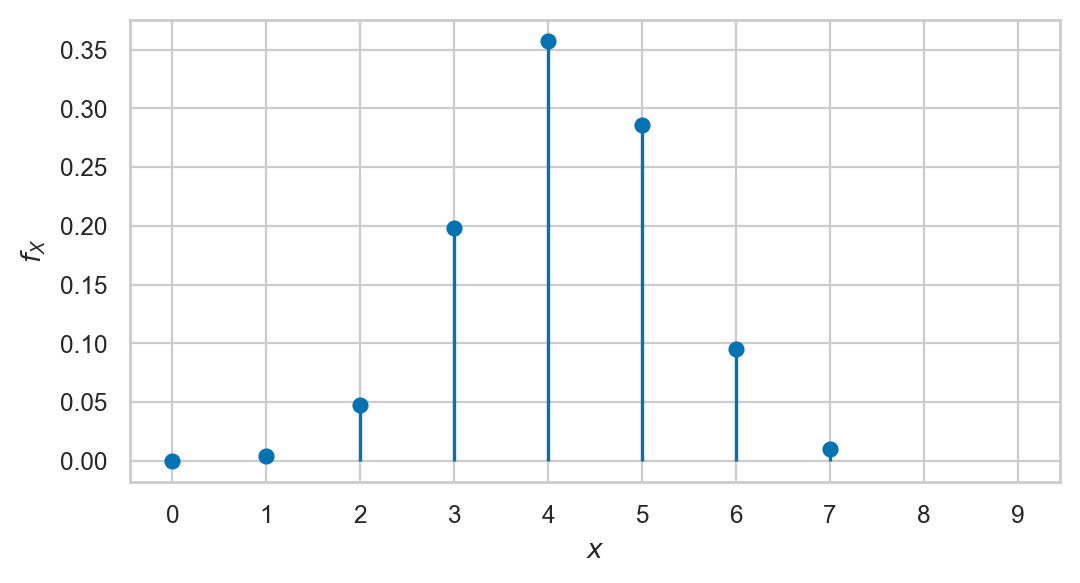

In [112]:
plot_pmf(rvD, xlims=[0,10]);

### Combinatorics

See SciPy docs:

- https://docs.scipy.org/doc/scipy/reference/generated/scipy.special.factorial.html
- https://docs.scipy.org/doc/scipy/reference/generated/scipy.special.perm.html
- https://docs.scipy.org/doc/scipy/reference/generated/scipy.special.comb.html




#### Products

In [113]:
import numpy as np
np.prod([2,6])

12

In [114]:
# # ALT.
# from math import prod
# prod([2,6])

#### Factorial

In [115]:
from scipy.special import factorial

factorial(4)

24.0

In [116]:
# # ALT.
# from math import factorial
# factorial(4)

The factorial of $0$ is defined as 1: $0!=1$.

In [117]:
factorial(0)

1.0

The factorial function grows grows very quickly:

In [118]:
[factorial(n) for n in [5, 6, 7, 8, 9, 10, 11, 12, 13]]

[120.0,
 720.0,
 5040.0,
 40320.0,
 362880.0,
 3628800.0,
 39916800.0,
 479001600.0,
 6227020800.0]

#### Permutations

In [119]:
from scipy.special import perm

perm(5,2)

20.0

In [120]:
perm(5,1), perm(5,2), perm(5,3), perm(5,4), perm(5,5)

(5.0, 20.0, 60.0, 120.0, 120.0)

#### Combinations

In [121]:
from scipy.special import comb

comb(5, 2)

10.0

### Exercises

In [122]:
from scipy.special import comb

comb(12,6)

924.0

In [123]:
from scipy.special import comb

comb(52,5)

2598960.0